In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tyssue import config, Sheet, SheetGeometry, History, EventManager, PlanarGeometry
from tyssue.draw import sheet_view

from tyssue.draw.plt_draw import plot_forces

from tyssue.dynamics.planar_vertex_model import PlanarModel
from tyssue.draw.plt_draw import plot_forces
from tyssue.solvers import QSSolver

geom  = PlanarGeometry
fmodel = PlanarModel

Average Cell Area = 1.000


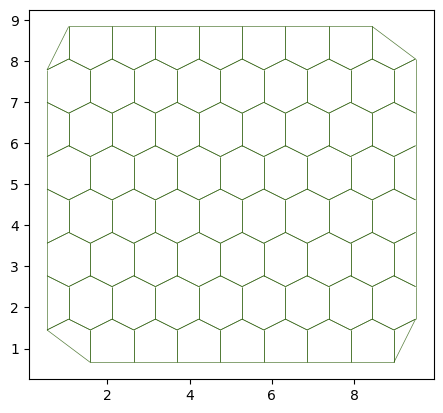

In [31]:
sheet = Sheet.planar_sheet_2d('planar', nx=10, ny=10, 
                             distx=1, disty=1)
sheet.sanitize(trim_borders=True, order_edges=True)
geom.update_all(sheet)

geom.scale(sheet, 1/sheet.face_df['area'].mean()**0.5, coords=sheet.coords)
geom.update_all(sheet)

print(f"Average Cell Area = {sheet.face_df['area'].mean():.3f}")

fig, ax = sheet_view(sheet)

Initial energy:  39.188073621576606
Successfull gradient descent?  True
Final energy:  31.172762752555283


,gx,gy
srce,,
0,-0.000315,-0.000727
1,0.001009,0.000724
2,0.000243,0.000230
3,-0.002226,0.000139
4,0.001732,-0.000693
...,...,...
137,-0.001144,0.000791
138,-0.000462,0.000286
139,0.001125,0.000365


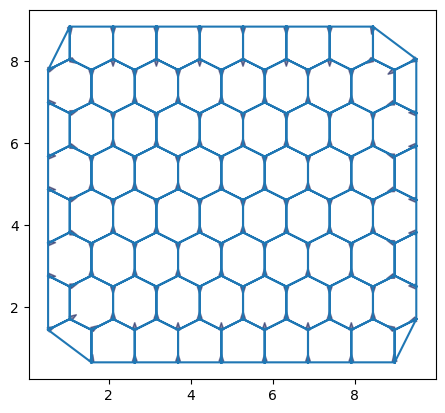

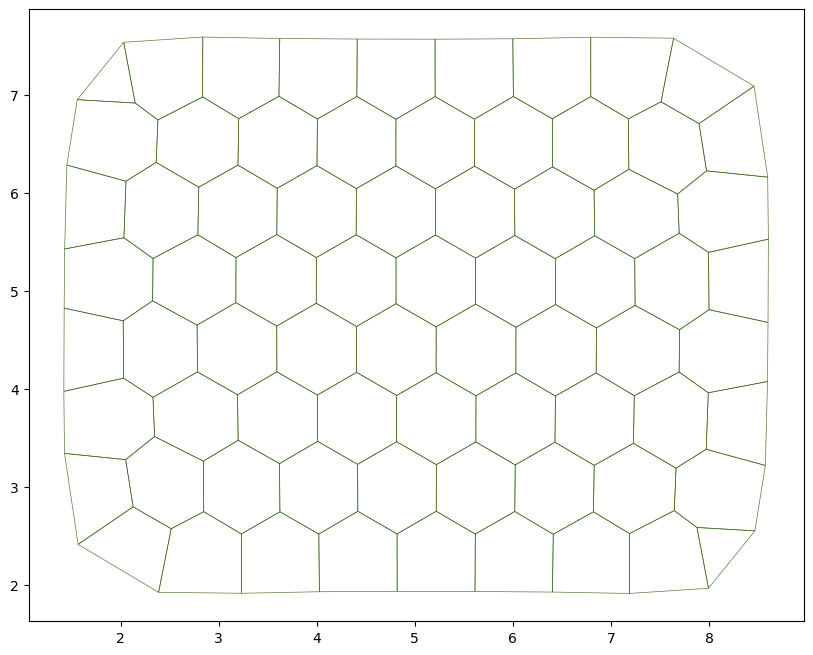

In [32]:
specs = {
    'edge': {
        'is_active': 1,
        'line_tension': 0.12,
        'ux': 0.0,
        'uy': 0.0,
        'uz': 0.0
    },
   'face': {
       'area_elasticity': 1.0,
       'contractility': 0.04,
       'is_alive': 1,
       'prefered_area': 1.0},
   'settings': {
       'grad_norm_factor': 1.0,
       'nrj_norm_factor': 1.0
   },
   'vert': {
       'is_active': 1
   }
}

sheet.update_specs(specs)

fig, ax = plot_forces(sheet, geom, fmodel, ['x', 'y'], scaling=0.05)
E_t = fmodel.compute_energy(sheet)
print("Initial energy: ", E_t)

solver = QSSolver()
res = solver.find_energy_min(sheet, geom, fmodel)

print("Successfull gradient descent? ", res['success'])
fig, ax = sheet_view(sheet)

fig.set_size_inches(10, 10)
ax.set_aspect('equal')

E_t = fmodel.compute_energy(sheet)
print("Final energy: ", E_t)

display(fmodel.compute_gradient(sheet))